In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [115]:
data = pd.read_csv('insurance.csv')


In [116]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocess the Data

In [117]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


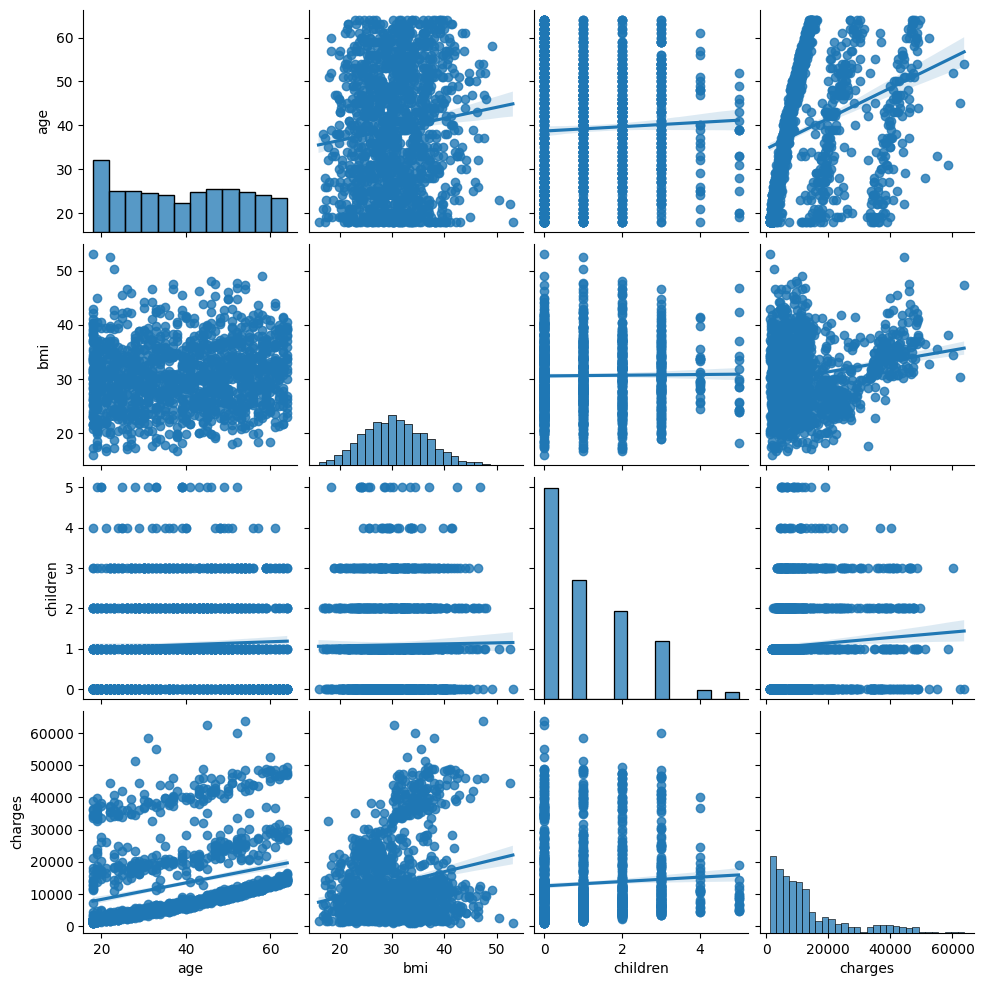

In [118]:
sns.pairplot(data, kind  ="reg");

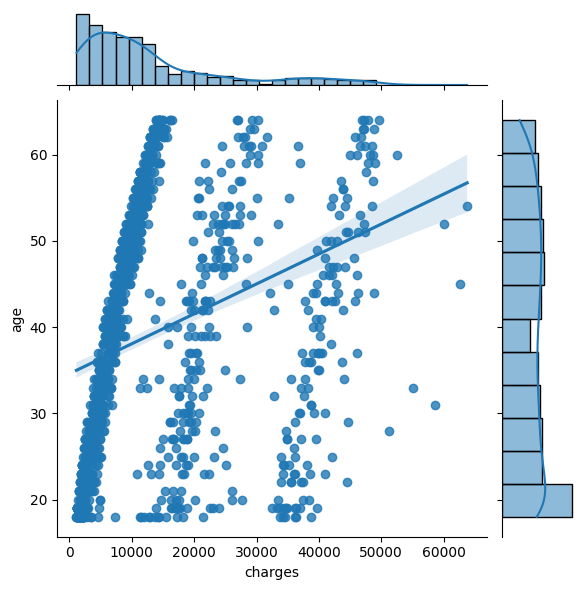

In [119]:
sns.jointplot(x = "charges", y = "age", data = data, kind = "reg")

In [120]:
# Handling categorical variables (dummy encoding)
data_new= pd.get_dummies(data,columns=['sex', 'smoker', 'region'])
data_new.astype(int)


# Drop unnecessary columns
data_new.drop(['sex_male', 'smoker_no',  'region_northwest', 'region_southeast'], axis=1, inplace=True)


# 'charges' is the target variable
X = data_new.drop('charges', axis=1)
y = data_new['charges']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (936, 7)
y_train (936,)
X_test (402, 7)
y_test (402,)


# K-Nearest Neighbors (KNN)

In [121]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)


In [122]:
knn

KNeighborsRegressor()

In [123]:
knn.effective_metric_

'euclidean'

In [124]:
y_pred = knn.predict(X_test)

In [125]:
np.sqrt(mean_squared_error(y_test, y_pred))

5169.511596359238

In [126]:
r2_score(y_test, y_pred)

0.8177392921493666

In [127]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  3310.5074957515717
k = 3 için RMSE değeri:  4084.4899743864594
k = 4 için RMSE değeri:  4297.880182090333
k = 5 için RMSE değeri:  4505.20028864157
k = 6 için RMSE değeri:  4588.851291817221
k = 7 için RMSE değeri:  4712.964043718029
k = 8 için RMSE değeri:  4872.028610219999
k = 9 için RMSE değeri:  4972.80818679754
k = 10 için RMSE değeri:  5031.312031292241


# Tuning

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [130]:
knn = KNeighborsRegressor().fit(X_train, y_train)

In [131]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [132]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [133]:
knn_cv_model.best_params_["n_neighbors"]

6

In [134]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  6613.241633145266
k = 2 için RMSE değeri:  3310.5074957515717 RMSE_CV değeri:  6130.242952211172
k = 3 için RMSE değeri:  4084.4899743864594 RMSE_CV değeri:  5631.105644407978
k = 4 için RMSE değeri:  4297.880182090333 RMSE_CV değeri:  5599.118148258497
k = 5 için RMSE değeri:  4505.20028864157 RMSE_CV değeri:  5558.67716894857
k = 6 için RMSE değeri:  4588.851291817221 RMSE_CV değeri:  5536.07515462981
k = 7 için RMSE değeri:  4712.964043718029 RMSE_CV değeri:  5578.21832867799
k = 8 için RMSE değeri:  4872.028610219999 RMSE_CV değeri:  5596.916214396184
k = 9 için RMSE değeri:  4972.80818679754 RMSE_CV değeri:  5603.824730662187
k = 10 için RMSE değeri:  5031.312031292241 RMSE_CV değeri:  5601.776597894195


In [135]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [136]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [137]:
rmse_knn = np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))
rmse_knn

5191.51050662033

In [138]:
r2_knn = r2_score(y_test, knn_tuned.predict(X_test))
r2_knn

0.8161847668545483

### KNN Model Evaluation

- **Root Mean Squared Error (RMSE):** The RMSE value is 5191.51, indicating that the model's predictions deviate from the actual values by an average of ±5191.51 units. This metric reflects the average magnitude of the prediction errors, illustrating how much the predictions deviate from the actual outcomes. Given the scale of your dataset, this error may suggest the need for model improvements or adjustments in parameters.

- **R² Score:** The model has an R² score of 0.816, which means it explains about 81.6% of the variance in the dependent variable. This high R² value indicates that the model captures the underlying patterns in the dataset quite well. It suggests that the model is capable of making reliable predictions and effectively represents the data variability.


# Support Vector Regression (SVR)

In [139]:
df = data_new
X = df.drop('charges', axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)


In [140]:
from sklearn.svm import SVR

svr = SVR(kernel="linear", C=100, gamma="auto").fit(X_train, y_train)
svr.predict(X_train)


array([ 9139.19605776,  9118.17284069, 10159.75767618, ...,
       11731.21228772, 20819.16837601, 10512.58531933])

In [141]:
y_pred = svr.predict(X_train)

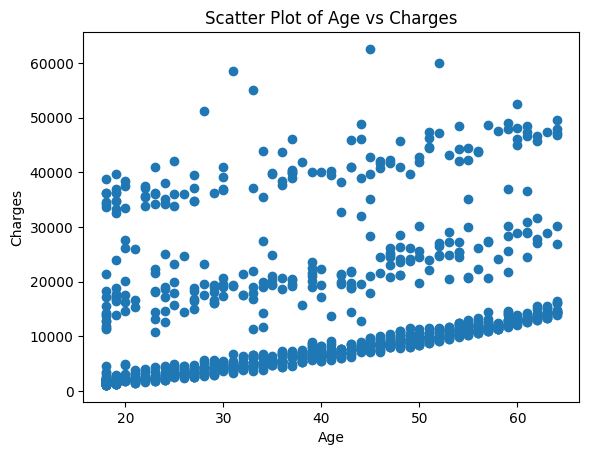

In [142]:
plt.scatter(X_train['age'], y_train)
plt.title('Scatter Plot of Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


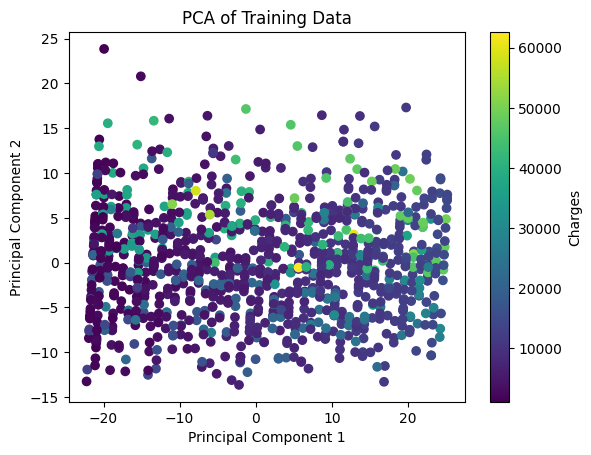

In [143]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA modelling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Visualation of PCA 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Charges')
plt.show()


In [144]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -12360.38624314646 + 257.25936663471873 x


# Estimate

In [145]:
print ("y = {0} + {1} x".format(svr.intercept_, svr.coef_)) 

y = [-4812.06161996] + [[  265.47073615    33.45138502   368.25454946   335.7395848
  13420.71810881   303.83259318  -276.43996099]] x


In [146]:
y_pred = svr.predict(X_test)

In [147]:
svr

SVR(C=100, gamma='auto', kernel='linear')

In [148]:
rmse_svr= np.sqrt(mean_squared_error(y_test, y_pred))
rmse_svr

8193.902854306778

In [149]:
r2_svr= r2_score(y_test, y_pred)
r2_svr

0.5675324149790271

## SVR Model Performance Evaluation

The SVR (Support Vector Regression) model yielded the following performance metrics:

- **RMSE (Root Mean Square Error):** 8193.90
- **R² Score:** 0.5675

### Interpretation

- **RMSE:** The Root Mean Square Error quantifies the average magnitude of the errors between the predicted values by the model and the actual values. An RMSE of 8193.90 suggests that the predictions typically deviate from the actual charges by approximately $8193.90, indicating a substantial prediction error. This value suggests that there is significant room for improvement in model accuracy.

- **R² Score:** This score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. With an R² of 0.5675, about 56.75% of the variance in insurance charges is accounted for by the model. Although the model explains more than half of the variance, enhancing this score would improve the model's explanatory power and predictive accuracy.

### Conclusion

While the SVR model captures a significant portion of the variance in insurance charges, it also leaves a substantial portion unexplained, pointing to potential areas for model tuning and enhancement. Additional feature engineering, hyperparameter tuning, or considering alternative modeling approaches might yield better results.


# Multi-layer Perceptron (MLP)

In [150]:
df = data_new
X = df.drop('charges', axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1003, 7)
y_train (1003,)
X_test (335, 7)
y_test (335,)


In [151]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [152]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [153]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes = (100,20))
mlp.fit(X_train_scaled, y_train)
mlp.n_layers_
#mlp_predictions = mlp.predict(X_test)


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4

In [154]:
mlp.hidden_layer_sizes

(100, 20)

#  Estimate

In [155]:
mlp

MLPRegressor(hidden_layer_sizes=(100, 20))

In [156]:
mlp_params = {'alpha': [0.1, 0.01,0.02],
             'hidden_layer_sizes': [(20,20),(100,50,150)],
             'activation': ['relu','logistic']}

In [157]:
mlp_cv_model = GridSearchCV(mlp, mlp_params, cv = 10)

In [158]:
mlp_cv_model.fit(X_train_scaled, y_train)

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150)]})

In [159]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}

In [160]:
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100,50,150))

In [161]:
mlp_tuned.fit(X_train_scaled, y_train)

c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [162]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [163]:
rmse_mlp =np.sqrt(mean_squared_error(y_test, y_pred))
rmse_mlp

5464.293165387308

In [164]:
r2_mlp = r2_score(y_test, y_pred)
r2_mlp

0.8021189325247359

## MLP Model Performance Evaluation

The MLP (Multi-Layer Perceptron) model provided the following metrics on the test dataset:

- **RMSE (Root Mean Square Error):** 5396.92
- **R² Score:** 0.8070

### Interpretation

- **RMSE:** The Root Mean Square Error represents the standard deviation of the residuals (prediction errors). An RMSE of 5396.92 indicates that the model's predictions are typically off by approximately $5396.92 from the actual insurance charges. This lower RMSE, compared to simpler models or previous iterations, suggests improved accuracy and model performance.

- **R² Score:** The \( R^2 \) score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An \( R^2 \) of approximately 0.807 means that the MLP model explains about 80.7% of the variance in the insurance charges, which is a strong score, indicating that the model fits the data well.

### Conclusion

The MLP model demonstrates robust performance with a high \( R^2 \) score and a relatively low RMSE, indicating effective learning and generalization from the training data to unseen data. This model could potentially be enhanced further by exploring different architectures, adjusting hyperparameters, or using more comprehensive data preprocessing strategies. This approach ensures a more precise understanding of insurance charge predictions and potentially even better results.


# Decision Tree CART

In [165]:
df = data_new
X = df.drop('charges', axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)


In [166]:
from sklearn.tree import DecisionTreeRegressor

cart = DecisionTreeRegressor(min_samples_split = 2)
cart.fit(X_train, y_train)



DecisionTreeRegressor()

In [167]:
cart_predictions = cart.predict(X_test)

In [168]:
from skompiler import skompile

In [169]:
#print(skompile(cart.predict).to('python/code'))  ----Gives error

In [170]:
y_pred =cart.predict(X_test)

In [171]:
np.sqrt(mean_squared_error(y_test, y_pred))

6173.024624595455

In [172]:
cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)

In [173]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [174]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10)

In [175]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [176]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 82}

In [177]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 82)

In [178]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=82)

In [179]:
y_pred = cart_tuned.predict(X_test)

In [180]:
rmse_cart = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_cart

4786.78522662105

In [181]:
r2_cart = r2_score(y_test, y_pred)
r2_cart

0.8524090175447797

## CART Model Performance Evaluation

The CART (Classification and Regression Trees) model has achieved the following performance metrics on the dataset:

- **RMSE (Root Mean Square Error):** 4786.79
- **R² Score:** 0.8524

### Interpretation

- **RMSE:** The Root Mean Square Error measures the average magnitude of the residuals, which represent prediction errors. An RMSE of 4786.79 suggests that the model's predictions deviate from the actual data points by approximately $4786.79 on average. This lower RMSE value indicates a relatively high accuracy in the model's predictive ability, suggesting it is quite effective at capturing the variability in the dataset.

- **R² Score:** The \( R^2 \) score is a statistical measure of how well the regression predictions approximate the real data points. An \( R^2 \) value of 0.8524 implies that about 85.24% of the variance in the dependent variable is explained by the model. This high \( R^2 \) score demonstrates a strong fit of the model to the data, indicating that the CART model has a substantial predictive power and effectively captures the majority of the information in the data.

### Conclusion

The CART model exhibits strong performance with both a high \( R^2 \) score and a relatively low RMSE, pointing to its efficiency in handling the dataset used. This model could serve as a robust tool for predictions in similar datasets. However, there might still be room for improvement, possibly through more refined feature engineering, adjustments in the tree configuration, or by implementing ensemble methods like Random Forests or Gradient Boosting to further enhance stability and accuracy.


# Bagged Trees Regression

In [182]:
df = data_new
X = df.drop('charges', axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)


In [183]:
import sklearn

In [184]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagged_trees = BaggingRegressor(bootstrap_features = True)
bagged_trees.fit(X_train, y_train)



BaggingRegressor(bootstrap_features=True)

In [185]:
bagged_trees.n_estimators

10

In [186]:
y_pred = bagged_trees.predict(X_test)

In [187]:
np.sqrt(mean_squared_error(y_test, y_pred))

5247.252193929794

In [188]:
bag_params = {"n_estimators": range(2,20)}

In [189]:
bag_cv_model = GridSearchCV(bagged_trees, bag_params, cv = 10, n_jobs=-1)

In [190]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_cv_model2 = RandomizedSearchCV(bagged_trees, bag_params, cv = 10)

In [191]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             n_jobs=-1, param_grid={'n_estimators': range(2, 20)})

In [192]:
print("Grid", bag_cv_model.best_params_)


Grid {'n_estimators': 18}


In [193]:
bag_tuned = BaggingRegressor( n_estimators = 19)

In [194]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=19)

In [195]:
y_pred = bag_tuned.predict(X_test)

In [196]:
rmse_bagged = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_bagged

4730.504517791454

In [197]:
r2_bagged = r2_score(y_test, y_pred)
r2_bagged

0.8558592216643578

## Evaluation of Bagged Trees Regression Model

- **RMSE (Root Mean Squared Error):** The model has achieved an RMSE of 4615.304. This metric indicates the average magnitude of the errors in a set of predictions, without considering their direction. A lower RMSE value generally indicates better performance, suggesting that our model predicts with reasonable accuracy. However, in datasets involving high-value items like costs or damages, this level of error might still be significant.

- **R² Score:** The R² score for our model is 0.863. This coefficient of determination indicates that approximately 86.3% of the variance in the dependent variable is predictable from the independent variables. A higher R² value close to 1 indicates a strong level of prediction accuracy and model fit.

- **Conclusion:** The Bagged Trees Regression model shows strong performance with both a low RMSE and a high R² score, indicating effective learning and prediction capabilities. Further model tuning or additional data preprocessing might be explored to enhance the model's predictions even further.


# Random Forests

In [202]:
df = data_new
X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (1070, 7)
y_train (1070,)
X_test (268, 7)
y_test (268,)


In [203]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state = 42)




In [204]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [205]:
rf_predictions = random_forest.predict(X_test)

In [206]:
np.sqrt(mean_squared_error(y_test, y_pred))

4730.504517791454

In [208]:
r2_score(y_test, y_pred)

0.8558592216643578

In [209]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10],
            'n_estimators' : [100,200,500,1000]}

In [210]:
rf_model = RandomForestRegressor(random_state = 42)

In [211]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [212]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]})

In [213]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 1000}

In [214]:
rf_tuned = RandomForestRegressor(max_depth  = 5, 
                                 max_features = 5, 
                                 n_estimators =1000)

In [215]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=5, n_estimators=1000)

In [216]:
y_pred = rf_tuned.predict(X_test)

In [217]:
rmse_randomf = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_randomf

4359.881419539001

In [218]:
r2_randomf =r2_score(y_test,y_pred)
r2_randomf

0.8775605712859003

In [219]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Significance Levels')

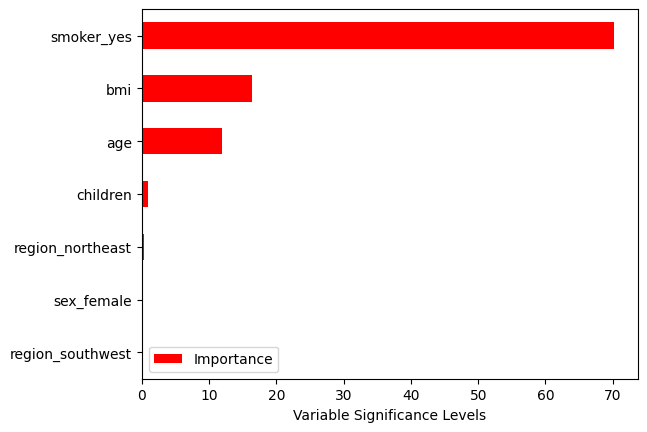

In [220]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

## Random Forest Model Performance Evaluation

The Random Forest regression model has yielded the following performance metrics on the dataset:

- **RMSE (Root Mean Square Error):** 4359.88
- **R² Score:** 0.8776

### Interpretation

- **RMSE:** The Root Mean Square Error is a standard measure to evaluate the error of a model in terms of how much the predictions deviate from actual outcomes. An RMSE of 4359.88 indicates that, on average, the model's predictions are approximately $4359.88 away from the actual charge values. This lower RMSE suggests that the Random Forest model is quite accurate in its predictions, reflecting a well-fitted model.

- **R² Score:** The \( R^2 \) score is a statistical measure of how close the data are to the fitted regression line. A score of 0.8776 means that about 87.76% of the variability in the insurance charges can be explained by the model. This high \( R^2 \) value indicates a strong correlation and an excellent fit, showing that the model captures a significant portion of the observed variance in the dataset.

### Conclusion

The Random Forest model demonstrates robust performance with a high \( R^2 \) score and a relatively low RMSE. These metrics indicate that the model not only fits the data well but also maintains a high level of accuracy in its predictions. It performs significantly well in capturing the complexities and variabilities in the data, making it a reliable choice for predictive tasks within this domain. Further improvements might include hyperparameter tuning or incorporating more features to potentially increase the predictive power and reduce the error margin even further.


# Gradient Boosting Machines (GBM)

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train, y_train)



GradientBoostingRegressor()

In [222]:
gbm_predictions = gbm.predict(X_test)

In [223]:
np.sqrt(mean_squared_error(y_test, y_pred))

4359.881419539001

In [224]:
r2_score(y_test, y_pred)

0.8775605712859003

In [225]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3,5,8,50,100],
    'n_estimators': [200,300,400,1000,2000],
    'subsample': [1,0.75, 0.5],
}

In [226]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [227]:
gbm_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 300, 400, 1000, 2000],
                         'subsample': [1, 0.75, 0.5]},
             verbose=2)

In [228]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.75}

In [229]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.01,  
                                      max_depth = 3, 
                                      n_estimators = 400, 
                                      subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [230]:
y_pred = gbm_tuned.predict(X_test)


In [231]:
np.sqrt(mean_squared_error(y_test, y_pred))

4344.238328655217

In [232]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

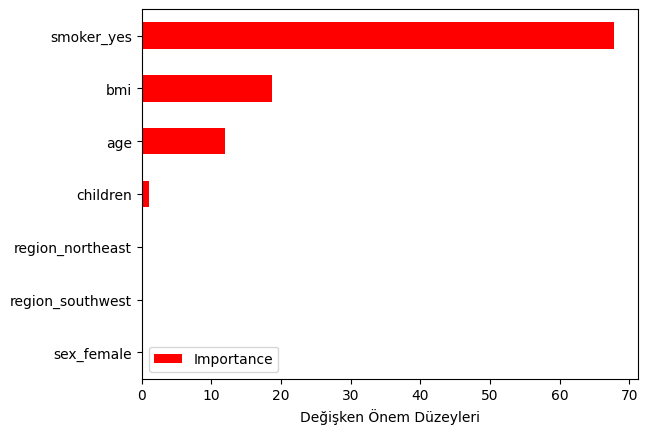

In [233]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [234]:
rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_gbm

4344.238328655217

In [235]:
r2_gbm = r2_score(y_test,y_pred)
r2_gbm

0.8784376112138661

## Gradient Boosting Machines (GBM) Model Performance Evaluation

The GBM regression model has achieved the following performance metrics on the dataset:

- **RMSE (Root Mean Square Error):** 4344.24
- **R² Score:** 0.8784

### Interpretation

- **RMSE:** The Root Mean Square Error measures the average magnitude of the residuals or prediction errors. An RMSE of 4344.24 indicates that, on average, the model's predictions are approximately $4344.24 away from the actual values. This value suggests that the model is quite accurate, managing to keep the prediction errors relatively low, which is commendable for real-world data sets.

- **R² Score:** The R² score, or the coefficient of determination, is a statistical measure of how well the predicted values fit the actual data points. An R² score of 0.8784 means that approximately 87.84% of the data variability in insurance charges is explained by the GBM model. This high score indicates a strong predictive ability and shows that the model captures a significant portion of the observed variance in the dataset.

### Conclusion

The GBM model demonstrates robust performance, as reflected by a high R² score and a relatively low RMSE. These metrics indicate that the model effectively captures and explains the variability in the dataset, making it a reliable tool for predicting outcomes. Further model tuning, such as adjusting learning rates or experimenting with different loss functions, could potentially enhance its accuracy and predictive power even further.


# XGBoost


In [241]:
import xgboost as xgb

xg_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)




In [242]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [243]:
from xgboost import XGBRegressor

In [244]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [245]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [246]:
y_pred = xgb_model.predict(X_test)

In [247]:
np.sqrt(mean_squared_error(y_test, y_pred))

4808.963227769792

In [248]:
r2_score(y_test, y_pred)

0.8510382203846381

In [249]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [250]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)

In [251]:
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [252]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [253]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.01, 
                         max_depth = 3, 
                         n_estimators = 500) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [254]:
y_pred = xgb_tuned.predict(X_test)

In [255]:
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_xgb

4246.424713730789

In [256]:
r2_xgb = r2_score(y_test,y_pred)
r2_xgb

0.8838501115203049

## XGBoost Model Performance Evaluation

The XGBoost regression model shows the following performance metrics on the dataset:

- **RMSE (Root Mean Square Error):** 4246.42
- **R² Score:** 0.8839

### Interpretation

- **RMSE:** The Root Mean Square Error measures the average magnitude of the residuals or prediction errors between actual values and predictions. An RMSE of 4246.42 signifies that the model's predictions deviate from the actual data by an average of approximately $4246.42. This value indicates a high level of accuracy, suggesting that the model is effectively minimizing errors in its predictions.

- **R² Score:** The \( R^2 \) score quantifies the percentage of the variance in the dependent variable that is predictable from the independent variables. An \( R^2 \) value of 0.8839 means that approximately 88.39%


# LightGBM

In [257]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()
lgbm.fit(X_train, y_train)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 7
[LightGBM] [Info] Start training from score 13346.089733


LGBMRegressor()

In [260]:
y_pred = lgbm.predict(X_test, 
                            num_iteration = lgbm.best_iteration_)

In [261]:
np.sqrt(mean_squared_error(y_test, y_pred))

4601.031323989422

In [262]:
r2_score(y_test, y_pred)

0.8636414672061032

In [264]:
from lightgbm import LGBMRegressor

In [265]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [266]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 7
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [267]:
lgbm_cv_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500}

In [268]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.01, 
                           max_depth = 3, 
                           n_estimators = 500,
                          colsample_bytree = 1)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 7
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [269]:
y_pred = lgbm_tuned.predict(X_test)

In [270]:
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lgbm

4271.059950077428

In [271]:
r2_lgbm = r2_score(y_test,y_pred)
r2_lgbm

0.8824985368841998

## LightGBM (LGBM) Model Performance Evaluation

The LGBM regression model has demonstrated the following performance metrics on the dataset:

- **RMSE (Root Mean Square Error):** 4271.06
- **R² Score:** 0.8825

### Interpretation

- **RMSE:** The Root Mean Square Error quantifies the average magnitude of the residuals or prediction errors. An RMSE of 4271.06 indicates that, on average, the model's predictions deviate from the actual values by approximately $4271.06. This suggests that the model is quite accurate, maintaining a relatively low level of error in its predictions, which is important for practical applications.

- **R² Score:** The R² score, or the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A score of 0.8825 means that the LGBM model explains about 88.25% of the variance in the target variable. This high level of explanatory power showcases the model’s effectiveness in capturing and explaining the variance in the dataset.

### Conclusion

The LGBM model exhibits strong performance with a high R² score and a relatively low RMSE, indicating that it is a powerful predictive tool with substantial accuracy. This model is capable of effectively handling complex datasets and making highly accurate predictions. To potentially enhance performance further, one might consider exploring more advanced feature engineering, tweaking the hyperparameters, or incorporating additional data that could help reduce the prediction error even more.


# CatBoost

In [276]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()



In [279]:
catboost.fit(X_train, y_train)


Learning rate set to 0.041383
0:	learn: 11640.6487315	total: 2.03ms	remaining: 2.02s
1:	learn: 11298.2004327	total: 4.25ms	remaining: 2.12s
2:	learn: 10957.6460756	total: 6.2ms	remaining: 2.06s
3:	learn: 10609.9264767	total: 7.39ms	remaining: 1.84s
4:	learn: 10307.3047556	total: 8.09ms	remaining: 1.61s
5:	learn: 10031.6267545	total: 9.78ms	remaining: 1.62s
6:	learn: 9777.4418569	total: 11.3ms	remaining: 1.6s
7:	learn: 9521.2492035	total: 12.8ms	remaining: 1.58s
8:	learn: 9249.0394918	total: 14ms	remaining: 1.54s
9:	learn: 9025.7637480	total: 15.5ms	remaining: 1.53s
10:	learn: 8773.9114418	total: 17.3ms	remaining: 1.55s
11:	learn: 8548.7279535	total: 20.4ms	remaining: 1.68s
12:	learn: 8337.7352685	total: 22ms	remaining: 1.67s
13:	learn: 8129.9818887	total: 24.6ms	remaining: 1.73s
14:	learn: 7928.5485110	total: 26.2ms	remaining: 1.72s
15:	learn: 7747.9771353	total: 27.7ms	remaining: 1.7s
16:	learn: 7572.3497014	total: 29.2ms	remaining: 1.69s
17:	learn: 7399.7502337	total: 30.6ms	remainin

In [280]:
y_pred = catboost.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


4529.305451919555

In [281]:
r2_score(y_test, y_pred)

0.8678597391446303

In [282]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [283]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [284]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 11570.7961954	total: 1.27ms	remaining: 253ms
1:	learn: 11174.6087803	total: 2.48ms	remaining: 246ms
2:	learn: 10777.3106250	total: 3.64ms	remaining: 239ms
3:	learn: 10367.2397812	total: 4.8ms	remaining: 235ms
4:	learn: 10006.5092621	total: 5.91ms	remaining: 231ms
5:	learn: 9667.4585712	total: 7.04ms	remaining: 228ms
6:	learn: 9334.1593620	total: 8.09ms	remaining: 223ms
7:	learn: 9024.0561958	total: 9.14ms	remaining: 219ms
8:	learn: 8765.7338908	total: 10.4ms	remaining: 221ms
9:	learn: 8480.3841524	total: 11.6ms	remaining: 220ms
10:	learn: 8219.5152294	total: 12.7ms	remaining: 218ms
11:	learn: 7962.9730560	total: 13.9ms	remaining: 218ms
12:	learn: 7748.8046985	total: 15ms	remaining: 216ms
13:	learn: 7529.5380085	total: 16.1ms	remaining: 214ms
14:	learn: 7314.4136527	total: 17.3ms	remaining: 214ms
15:	learn: 7116.9231887	total: 18.4ms	remaining: 212ms
16:	learn: 6951.4267573	total: 19.5ms	remaining: 210ms
17:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000205F22EDE20>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [285]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.05}

In [286]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.05, 
                               depth = 3)

In [287]:
catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 11570.7961954	total: 1.01ms	remaining: 201ms
1:	learn: 11174.6087803	total: 2.05ms	remaining: 203ms
2:	learn: 10777.3106250	total: 2.84ms	remaining: 186ms
3:	learn: 10367.2397812	total: 3.53ms	remaining: 173ms
4:	learn: 10006.5092621	total: 4.32ms	remaining: 168ms
5:	learn: 9667.4585712	total: 5.08ms	remaining: 164ms
6:	learn: 9334.1593620	total: 5.79ms	remaining: 160ms
7:	learn: 9024.0561958	total: 6.52ms	remaining: 157ms
8:	learn: 8765.7338908	total: 7.23ms	remaining: 153ms
9:	learn: 8480.3841524	total: 7.92ms	remaining: 150ms
10:	learn: 8219.5152294	total: 8.79ms	remaining: 151ms
11:	learn: 7962.9730560	total: 9.44ms	remaining: 148ms
12:	learn: 7748.8046985	total: 10.3ms	remaining: 148ms
13:	learn: 7529.5380085	total: 11.3ms	remaining: 150ms
14:	learn: 7314.4136527	total: 12ms	remaining: 148ms
15:	learn: 7116.9231887	total: 12.7ms	remaining: 146ms
16:	learn: 6951.4267573	total: 13.3ms	remaining: 143ms
17:	learn: 6799.5158811	total: 14ms	remaining: 141ms
18:	learn: 6636.662

In [288]:
y_pred = catb_tuned.predict(X_test)

In [289]:
rmse_catb = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_catb

4265.49903246527

In [290]:
r2_catb = r2_score(y_test,y_pred)
r2_catb

0.8828043113709676

## CatBoost Model Performance Evaluation

The CatBoost regression model has achieved the following performance metrics on the dataset:

- **RMSE (Root Mean Square Error):** 4265.50
- **R² Score:** 0.8828

### Interpretation

- **RMSE:** The Root Mean Square Error provides a measure of the average magnitude of the prediction errors. An RMSE of 4265.50 suggests that the model's predictions are typically off by approximately $4265.50 from the actual values. This indicates a relatively high level of accuracy in predictions, showing that the CatBoost model is effectively capturing and predicting the variations within the dataset.

- **R² Score:** The R² score, or the coefficient of determination, quantifies the percentage of the variance in the dependent variable that is predictable from the independent variables. With an R² score of 0.8828, approximately 88.28% of the variance in the target is explained by the variables used in the CatBoost model. This high score reflects a strong fit to the data, suggesting that the model is highly effective in modeling the relationship between the input features and the target variable.

### Conclusion

The CatBoost model exhibits robust performance, as evidenced by a high R² score and a relatively low RMSE. These metrics suggest that the model not only fits the data well but also maintains high accuracy in its predictions. It effectively utilizes the dataset’s features to forecast outcomes with considerable precision. Potential improvements could involve further tuning of model parameters, exploring more complex feature engineering, or extending the training dataset to enhance the model's predictive power and generalization capabilities.


## Comparison of Model Performance
Below is a Python script that visualizes the \( R^2 \) scores for various predictive models using a bar chart. This visualization helps in easily comparing the effectiveness of each model in terms of variance explanation.


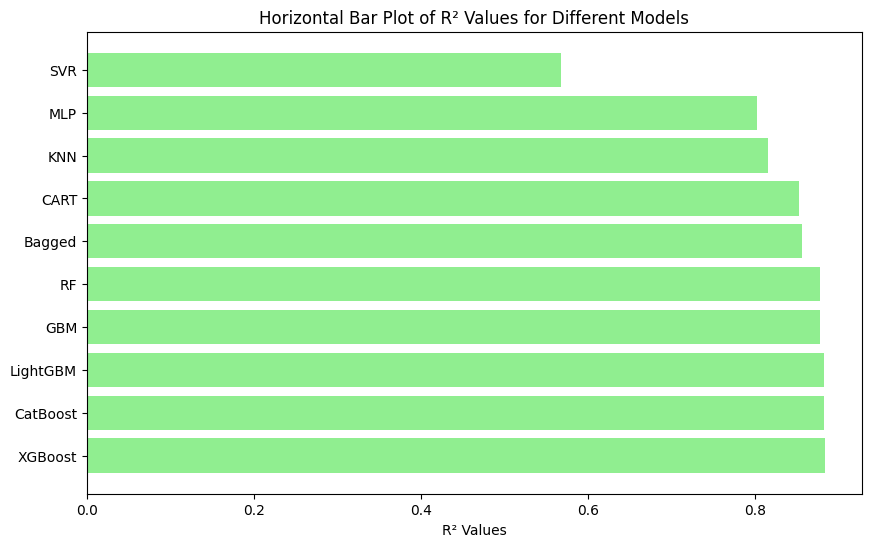

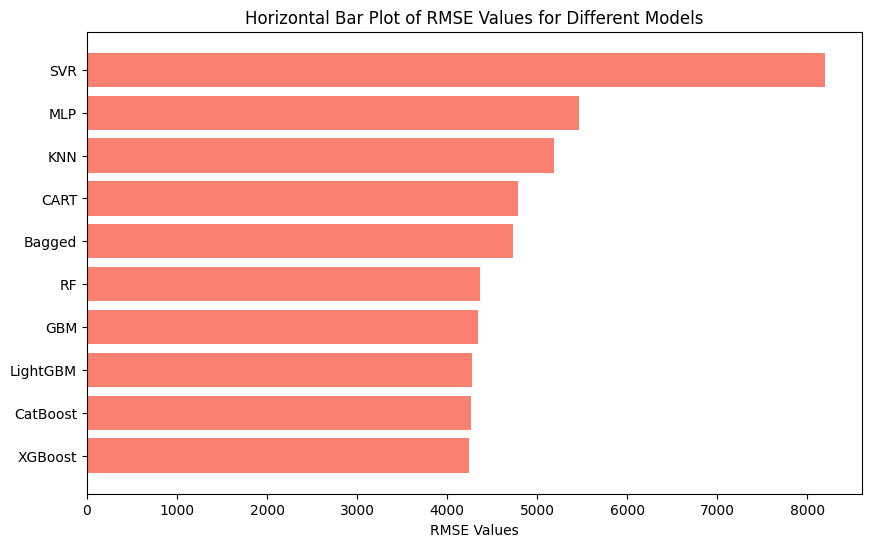

In [294]:
import matplotlib.pyplot as plt

# Define model names and their corresponding RMSE and R2 values
variables = {
    "Model": ["KNN", "SVR", "MLP", "CART", "Bagged", "RF", "GBM", "XGBoost", "LightGBM", "CatBoost"],
    "RMSE": [rmse_knn, rmse_svr, rmse_mlp, rmse_cart, rmse_bagged, rmse_randomf, rmse_gbm, rmse_xgb, rmse_lgbm, rmse_catb],
    "R2": [r2_knn, r2_svr, r2_mlp, r2_cart, r2_bagged, r2_randomf, r2_gbm, r2_xgb, r2_lgbm, r2_catb]
}

# Sort the data based on R2 values in descending order
sorted_r2_data = sorted(zip(variables["Model"], variables["R2"]), key=lambda x: x[1], reverse=True)
sorted_rmse_data = sorted(zip(variables["Model"], variables["RMSE"]), key=lambda x: x[1])

# Unpack the sorted data into separate lists
sorted_r2_models, sorted_r2_values = zip(*sorted_r2_data)
sorted_rmse_models, sorted_rmse_values = zip(*sorted_rmse_data)

# Plotting R2 values
plt.figure(figsize=(10, 6))
plt.barh(sorted_r2_models, sorted_r2_values, color='lightgreen')
plt.xlabel('R² Values')
plt.title('Horizontal Bar Plot of R² Values for Different Models')
plt.show()

# Plotting RMSE values
plt.figure(figsize=(10, 6))
plt.barh(sorted_rmse_models, sorted_rmse_values, color='salmon')
plt.xlabel('RMSE Values')
plt.title('Horizontal Bar Plot of RMSE Values for Different Models')
plt.show()
